# Análise dos dados para obter a resposta em frequêcia de p(t)
Utilizo sinais senoidais.

**Notebook para rascunhos e testes**.

In [1]:
import matplotlib
matplotlib.use('TkAgg')  # Configurar o backend para TkAgg
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from myfunctions import (read_ulog, list_all_fields, get_ulog_data, 
butter_lowpass_filter, list_topics, list_fields, 
get_euler_angles_from_quat, offboard_time_analysis)


In [2]:
# Caminho para o arquivo .ulg
file_path = 'ulogs/log_1_2025-1-11-14-07-26.ulg'
ulog = read_ulog(file_path)
w0 = 0.1 # (rad/s)
A = 0.15 # (rad)
N = 4.0  # períodos do sinal.
f0 = w0/(2*np.pi)
f0

0.015915494309189534

In [3]:
# Listar todos os field_data
list_topics(ulog)

actuator_armed
actuator_motors
actuator_outputs
battery_status
config_overrides
control_allocator_status
cpuload
distance_sensor_mode_change_request
esc_status
estimator_aid_src_baro_hgt
estimator_aid_src_gnss_hgt
estimator_aid_src_gnss_pos
estimator_aid_src_gnss_vel
estimator_aid_src_gravity
estimator_aid_src_mag
estimator_attitude
estimator_baro_bias
estimator_event_flags
estimator_global_position
estimator_gps_status
estimator_innovation_test_ratios
estimator_innovation_variances
estimator_innovations
estimator_local_position
estimator_odometry
estimator_selector_status
estimator_sensor_bias
estimator_states
estimator_status
estimator_status_flags
event
failsafe_flags
failure_detector_status
home_position
hover_thrust_estimate
landing_gear
mission_result
navigator_mission_item
navigator_status
offboard_control_mode
position_setpoint_triplet
rate_ctrl_status
rtl_status
rtl_time_estimate
sensor_accel
sensor_baro
sensor_baro
sensor_combined
sensor_gps
sensor_gyro
sensor_mag
sensor_pref

In [4]:
list_fields(ulog, 'vehicle_torque_setpoint')

timestamp_sample
xyz[0]
xyz[1]
xyz[2]


In [5]:
timestamps_torque, torque_roll   = get_ulog_data(ulog, 'vehicle_torque_setpoint', 'xyz[0]')


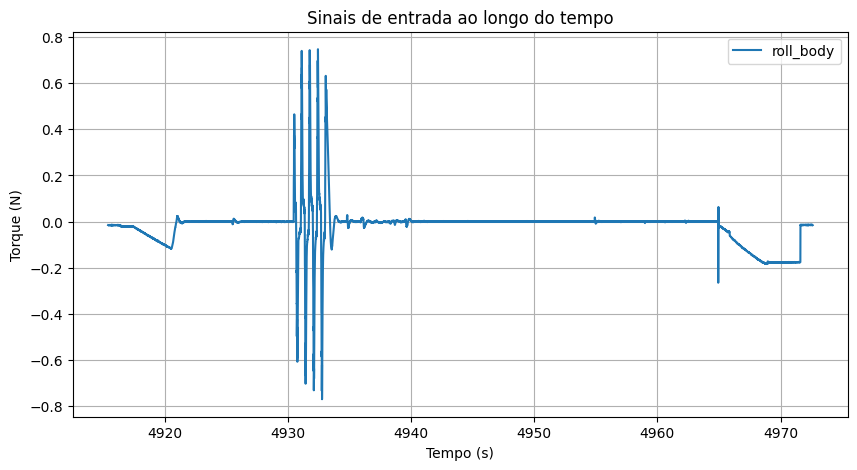

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(timestamps_torque, torque_roll, label='roll_body')
plt.xlabel('Tempo (s)')
plt.ylabel('Torque (N)')
plt.title('Sinais de entrada ao longo do tempo')
plt.legend()
plt.grid()
plt.show()


In [7]:
list_fields(ulog, 'vehicle_control_mode')

flag_armed
flag_multicopter_position_control_enabled
flag_control_manual_enabled
flag_control_auto_enabled
flag_control_offboard_enabled
flag_control_position_enabled
flag_control_velocity_enabled
flag_control_altitude_enabled
flag_control_climb_rate_enabled
flag_control_acceleration_enabled
flag_control_attitude_enabled
flag_control_rates_enabled
flag_control_allocation_enabled
flag_control_termination_enabled
source_id


In [8]:
offboard_up_time, offboard_down_time, offboard_flag_timestamp, offboard_flag_data = offboard_time_analysis(ulog)
#

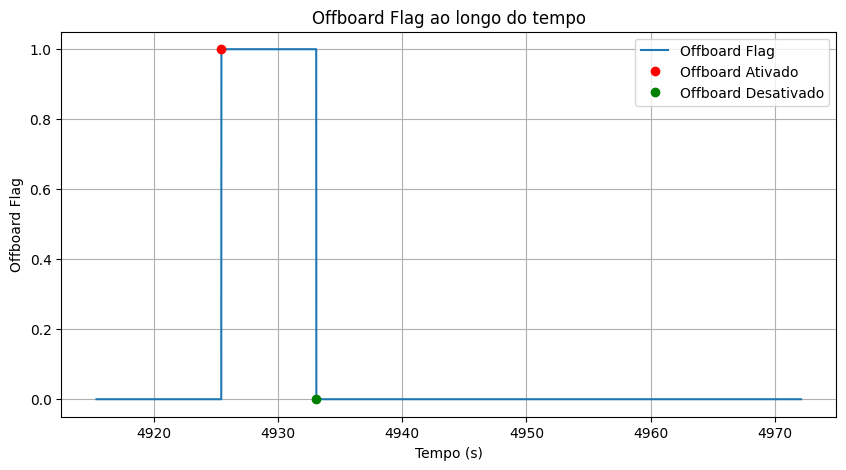

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(offboard_flag_timestamp, offboard_flag_data, label='Offboard Flag')
plt.plot(offboard_up_time, np.ones(len(offboard_up_time)), 'ro', label='Offboard Ativado')
plt.plot(offboard_down_time, np.zeros(len(offboard_down_time)), 'go', label='Offboard Desativado')
plt.plot()
plt.xlabel('Tempo (s)')
plt.ylabel('Offboard Flag')
plt.title('Offboard Flag ao longo do tempo')
plt.legend()
plt.grid()
plt.show()

In [10]:
list_fields(ulog, 'vehicle_attitude')

timestamp_sample
q[0]
q[1]
q[2]
q[3]
delta_q_reset[0]
delta_q_reset[1]
delta_q_reset[2]
delta_q_reset[3]
quat_reset_counter


In [11]:
# coletar dados do sinal de entrada
timestamps_q0, q0   = get_ulog_data(ulog, 'vehicle_attitude', 'q[0]')
timestamps_q1, q1   = get_ulog_data(ulog, 'vehicle_attitude', 'q[1]')
timestamps_q2, q2   = get_ulog_data(ulog, 'vehicle_attitude', 'q[2]')
timestamps_q3, q3   = get_ulog_data(ulog, 'vehicle_attitude', 'q[3]')

In [12]:
# Quaternions to Euler Angles
roll = get_euler_angles_from_quat(q0, q1, q2, q3, angle='roll')
pitch = get_euler_angles_from_quat(q0, q1, q2, q3, angle='pitch')
yaw = get_euler_angles_from_quat(q0, q1, q2, q3, angle='yaw')

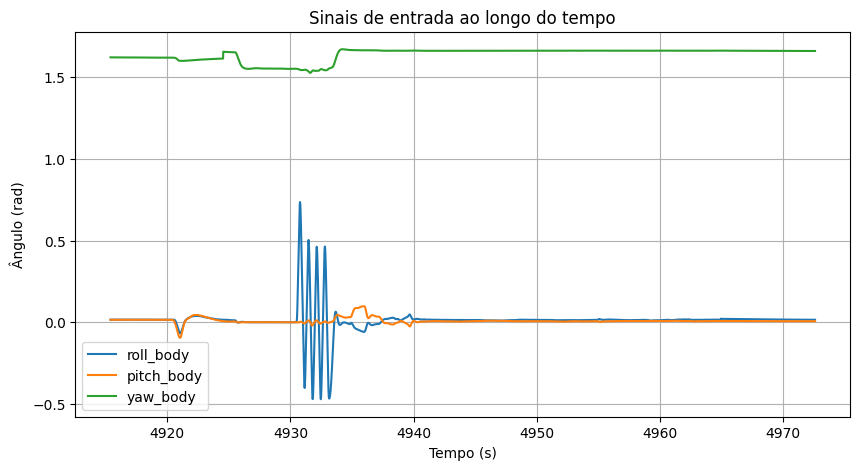

In [13]:
# Gerar os gráficos
plt.figure(figsize=(10, 5))
plt.plot(timestamps_q0, roll, label='roll_body')
plt.plot(timestamps_q0, pitch, label='pitch_body')
plt.plot(timestamps_q0, yaw, label='yaw_body')
plt.xlabel('Tempo (s)')
plt.ylabel('Ângulo (rad)')
plt.title('Sinais de entrada ao longo do tempo')
plt.legend()
plt.grid()
plt.show()

## Sinais dos motores e das taxas
Gerados indiretamente por meio da atitude desejada.

In [14]:
list_fields(ulog, 'actuator_motors')

timestamp_sample
control[0]
control[1]
control[2]
control[3]
control[4]
control[5]
control[6]
control[7]
control[8]
control[9]
control[10]
control[11]
reversible_flags


In [15]:
# Coletar os dados dos atuadores
timestamps_c0, control0 = get_ulog_data(ulog, 'actuator_motors', 'control[0]')
timestamps_c1, control1 = get_ulog_data(ulog, 'actuator_motors', 'control[1]')
timestamps_c2, control2 = get_ulog_data(ulog, 'actuator_motors', 'control[2]')
timestamps_c3, control3 = get_ulog_data(ulog, 'actuator_motors', 'control[3]')

In [16]:
# Coletar os dados das taxas de rotação
timestamps_vav0, vav0 = get_ulog_data(ulog, 'vehicle_angular_velocity', 'xyz[0]')
timestamps_vav1, vav1 = get_ulog_data(ulog, 'vehicle_angular_velocity', 'xyz[1]')
timestamps_vav2, vav2 = get_ulog_data(ulog, 'vehicle_angular_velocity', 'xyz[2]')

In [17]:
dt_controle = timestamps_c0[1] - timestamps_c0[0]  # Período de amostragem dos dados
#t_controle = np.linspace(0, len(control0)*dt_controle, len(control0))  # Vetor de tempo
#
dt_taxas = timestamps_vav0[1] - timestamps_vav0[0]  # Período de amostragem dos dados
#t_taxas = np.linspace(0, len(vav0)*dt_taxas, len(vav0))  # Vetor de tempo

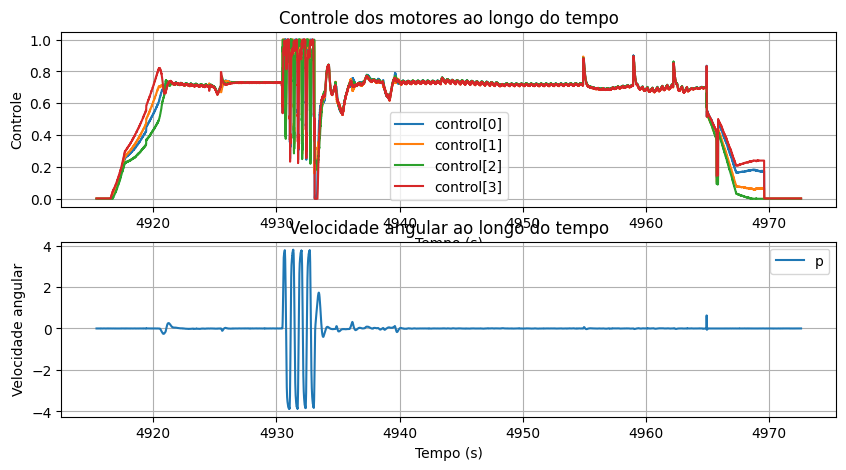

In [23]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))
#
ax1.plot(timestamps_c0, control0, label='control[0]')
ax1.plot(timestamps_c1, control1, label='control[1]')
ax1.plot(timestamps_c2, control2, label='control[2]')
ax1.plot(timestamps_c3, control3, label='control[3]')
#
ax1.set_xlabel('Tempo (s)')
ax1.set_ylabel('Controle')
ax1.set_title('Controle dos motores ao longo do tempo')
ax1.legend()
ax1.grid()
#
ax2.plot(timestamps_vav0, vav0, label='p')
#ax2.plot(timestamps_vav1, vav1, label='q')
#ax2.plot(timestamps_vav2, vav2, label='r')
#
ax2.set_xlabel('Tempo (s)')
ax2.set_ylabel('Velocidade angular')
ax2.set_title('Velocidade angular ao longo do tempo')
ax2.legend()
ax2.grid()
#
#plt.tight_layout()
plt.show()
#  

## Recorte de sinais e ajuste do sinal de controle

* O sinal de controle é obtido da seguinte forma `'control[1] + control[2] - control[0] - control[3]'`.
* É tirada a média dos sinais de controle.

In [19]:
# Os dados para o clip são dados a partir do tempo de offboard up e offboard down
offboard_up_time, offboard_down_time, offboard_flag_timestamp, offboard_flag_data = offboard_time_analysis(ulog)

In [20]:
# Recortando os dados para análise
t0_clip = offboard_up_time
t1_clip = offboard_down_time
t_controle = timestamps_c0
#
t_cont_clipped = t_controle[(t_controle >= t0_clip) & (t_controle <= t1_clip)] - t0_clip   # Recortando o vetor de tempo
controle0_clipped = control0[(t_controle >= t0_clip) & (t_controle <= t1_clip)] - np.mean(control0[(t_controle >= t0_clip) & (t_controle <= t1_clip)]) # Recortando o vetor de controle
controle1_clipped = control1[(t_controle >= t0_clip) & (t_controle <= t1_clip)] - np.mean(control1[(t_controle >= t0_clip) & (t_controle <= t1_clip)]) # Recortando o vetor de controle
controle2_clipped = control2[(t_controle >= t0_clip) & (t_controle <= t1_clip)] - np.mean(control2[(t_controle >= t0_clip) & (t_controle <= t1_clip)]) # Recortando o vetor de controle
controle3_clipped = control3[(t_controle >= t0_clip) & (t_controle <= t1_clip)] - np.mean(control3[(t_controle >= t0_clip) & (t_controle <= t1_clip)]) # Recortando o vetor de controle
# 
controle_clipped = controle1_clipped + controle2_clipped - controle0_clipped - controle3_clipped
# recortando as taxas de rotação

t_taxas = timestamps_vav0
t_taxas_clipped = t_taxas[(t_taxas >= t0_clip) & (t_taxas <= t1_clip)] - t0_clip   # Recortando o vetor de tempo
vav0_clipped = vav0[(t_taxas >= t0_clip) & (t_taxas <= t1_clip)]  # Recortando as taxas de rotação
vav1_clipped = vav1[(t_taxas >= t0_clip) & (t_taxas <= t1_clip)]  # Recortando as taxas de rotação
vav2_clipped = vav2[(t_taxas >= t0_clip) & (t_taxas <= t1_clip)]  # Recortando as taxas de rotação

In [21]:
# Filtrando os sinais
cutoff_freq = 5.0 # Hz
controle0_clipped_filt = butter_lowpass_filter(controle0_clipped, cutoff_freq, 1/dt_controle, order=5)
controle1_clipped_filt = butter_lowpass_filter(controle1_clipped, cutoff_freq, 1/dt_controle, order=5)
controle2_clipped_filt = butter_lowpass_filter(controle2_clipped, cutoff_freq, 1/dt_controle, order=5)
controle3_clipped_filt = butter_lowpass_filter(controle3_clipped, cutoff_freq, 1/dt_controle, order=5)
#
controle_clipped_filtered = controle1_clipped_filt + controle2_clipped_filt - controle0_clipped_filt - controle3_clipped_filt
#
vav0_clipped_filtered = butter_lowpass_filter(vav0_clipped, cutoff_freq, 1/dt_taxas, order=5)    

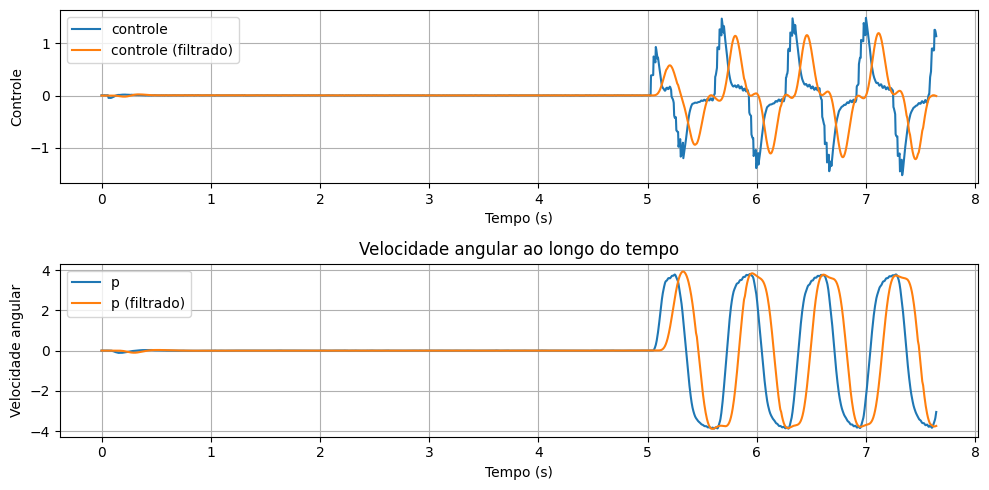

In [22]:
# Plotando os dados recortados
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))
#
ax1.plot(t_cont_clipped, controle_clipped, label='controle')
ax1.plot(t_cont_clipped, controle_clipped_filtered, label='controle (filtrado)')
ax1.set_xlabel('Tempo (s)')
ax1.set_ylabel('Controle')
ax1.legend()
ax1.grid()
#
ax2.plot(t_taxas_clipped, vav0_clipped, label='p')
ax2.plot(t_taxas_clipped, vav0_clipped_filtered, label='p (filtrado)')
#ax3.plot(t_taxas_clipped, vav1_clipped, label='q')
#ax3.plot(t_taxas_clipped, vav2_clipped, label='r')
ax2.set_xlabel('Tempo (s)')
ax2.set_ylabel('Velocidade angular')
ax2.set_title('Velocidade angular ao longo do tempo')
ax2.legend()
ax2.grid()
#
plt.tight_layout()
plt.show()